# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    

In [2]:
base_path = "/home/jakobs"

project_path = glue("{base_path}/data")
experiment = '231117'
experiment_path = glue("{project_path}/{experiment}")

endpoints_md = endpoint_defs = arrow::read_feather(glue("{base_path}/data/endpoints_epic_md.feather")) %>% filter(n_epic>=100)
endpoints = endpoint_defs$endpoint

In [3]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major.y=element_line()))

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [5]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
endpoint_order = endpoints

In [6]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_404", # Ischemic heart disease
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure
    "OMOP_4306655", # All-Cause Death
    # also generally important and relevant
    "phecode_440-3", # Pulmonary embolism
    "phecode_468", # Pneumonia
    "phecode_059-1", # COVID 19
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
    "phecode_542", # Chronic liver disease and sequelae
    "phecode_583", # Chronic kidney disease
    "phecode_328", # Dementias and cerebral degeneration
    # generally important and fun to check
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_665", # Psoriasis
    "phecode_705-1", # Rheumatoid arthritis
    # important for eye
    "phecode_371", # Cataract
    "phecode_374-3", # Retinal vascular changes and occlusions
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    "phecode_388" # Blindness and low vision
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )

endpoints_cardio = c(
    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_424', #  "Heart failure", # intervention
     'OMOP_4306655', #  "All-Cause Death", # intervention
    'phecode_420', #  "Cardiac arrest", # intervention
    "phecode_059-1" # COVID 19
   
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [7]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

## Load data

# Load Benchmarks

In [8]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '231117'
name = glue("benchmarks_{today}")
benchmark_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather")) %>% left_join(endpoints_md) %>% filter(endpoint %in% endpoints_md$endpoint)

Joining with `by = join_by(endpoint)`


In [9]:
benchmark_endpoints %>% group_by(endpoint, score) %>% summarise(cindex=mean(cindex)) %>% group_by(score) %>% summarise(mean(cindex)) %>% 
    arrange(`mean(cindex)`)

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


score,mean(cindex)
<chr>,<dbl>
Retina,0.6101717
Age+Sex,0.6348748
Age+Sex+Retina,0.6435979
SCORE2,0.6479103
ASCVD,0.6493873
SCORE2+Retina,0.6537749
ASCVD+Retina,0.6549236


In [10]:
benchmark_endpoints %>% write_csv("outputs/SupplFigure3.csv")

In [11]:
library(ggdist)

In [12]:
benchmark_endpoints_agg = benchmark_endpoints %>% group_by(endpoint, score) %>% median_qi(cindex) 

In [13]:
benchmark_endpoints_agg %>% mutate(label = glue("{round(cindex, 3)} ({round(.lower, 3)}, {round(.upper, 3)})"))

endpoint,score,cindex,.lower,.upper,.width,.point,.interval,label
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<glue>
OMOP_4306655,ASCVD,0.7136031,0.6879406,0.7725963,0.95,median,qi,"0.714 (0.688, 0.773)"
OMOP_4306655,ASCVD+Retina,0.7150254,0.6806739,0.7609252,0.95,median,qi,"0.715 (0.681, 0.761)"
OMOP_4306655,Age+Sex,0.7348437,0.7003964,0.7840693,0.95,median,qi,"0.735 (0.7, 0.784)"
OMOP_4306655,Age+Sex+Retina,0.7321299,0.6962280,0.7829711,0.95,median,qi,"0.732 (0.696, 0.783)"
OMOP_4306655,Retina,0.6025800,0.5331819,0.6388843,0.95,median,qi,"0.603 (0.533, 0.639)"
OMOP_4306655,SCORE2,0.7051680,0.6876764,0.7618018,0.95,median,qi,"0.705 (0.688, 0.762)"
OMOP_4306655,SCORE2+Retina,0.6926968,0.6698384,0.7375128,0.95,median,qi,"0.693 (0.67, 0.738)"
phecode_089,ASCVD,0.6840219,0.6601527,0.6952986,0.95,median,qi,"0.684 (0.66, 0.695)"
phecode_089,ASCVD+Retina,0.6874494,0.6668555,0.6998860,0.95,median,qi,"0.687 (0.667, 0.7)"


In [14]:
benchmark_endpoints %>% group_by(endpoint) %>% filter(endpoint =='phecode_059-1')

endpoint,score,model,iteration,time,cindex,n_epic,eligable,n,freq,phecode_string,phecode_category
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>


In [15]:
endpoints_sorted = (benchmark_endpoints %>% 
    filter(score == "Age+Sex+Retina") %>% 
    group_by(endpoint, score) %>% 
    summarise(cindex=mean(cindex, na.rm=TRUE)) %>% 
    arrange(cindex) %>% ungroup())$endpoint

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


In [16]:
categories_sorted = (endpoint_defs %>% distinct(phecode_category))$phecode_category

benchmark_endpoints## General Performance

In [17]:
library(ggdist)

In [18]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

## Performance against CVD Scores

In [19]:
plot_width = 8.25; plot_height=2; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

plot_against_score = function(score1, score2, endpoint_order=c()){
    
    scores_plot = c(score1, score2)#, "AgeSexRetina"
    
    score_label = glue("{score1} vs. {score2}")
    #print(score_label)

    temp = benchmark_endpoints %>% 
        filter(score %in% scores_plot) %>% 
        mutate(score = factor(score, levels=scores_plot)) %>%
        mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
        group_by(endpoint, score, phecode_string, phecode_category) %>%
        ungroup() %>%
        pivot_wider(names_from=score, values_from=cindex) %>% 
        mutate(id = row_number()) %>%
        mutate(delta = !!sym(score2)-!!sym(score1)) %>%
        mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
        mutate(endpoint = fct_reorder(endpoint, delta)) %>%
        mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
        mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
        filter(endpoint %in% endpoint_selection) #%>% mutate(endpoint=factor(endpoint, levels=endpoint_order_diff))
    
    temp_abs = temp %>% group_by(endpoint) %>% summarise(delta=median(delta), m_score2=median(!!sym(score2)), m_score1=median(!!sym(score1))) %>% ungroup() 
    #print(levels(temp_abs$endpoint))
    
    temp_abs_segment = temp_abs %>% rowwise() %>% mutate(min_cindex = min(m_score1, m_score2), max_cindex=max(m_score1, m_score2)) %>% ungroup()# %>% filter(abs(min_cindex-max_cindex)>0.02) 
    
    if (length(endpoint_order)>0){
        temp = temp %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        temp_abs = temp_abs %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        temp_abs_segment = temp_abs_segment %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        }
    #print(temp_abs_segment)
    
    abs = ggplot(temp_abs) + 
        #geom_violin(aes(x=fct_rev(endpoint), y=delta), size=0.5) +
        labs(y="Concordance Index", title=score_label)+

        #geom_segment(data=temp_abs_segment, mapping=aes(x=endpoint, xend=endpoint, y=min_cindex+0.01, yend=max_cindex-0.01), alpha=0.4)+#, arrow = arrow(length = unit(0.01, "npc")), arrow.fill="black")+#+
        geom_segment(aes(x=fct_rev(endpoint), xend=fct_rev(endpoint), y=m_score1+0.01, yend=m_score2-0.01), alpha=0.4, arrow = arrow(length = unit(0.01, "npc")), arrow.fill="black")+#,
    
        geom_point(aes(x=fct_rev(endpoint), y=m_score1), size=1, color="black", alpha=0.7)+
        #geom_point(aes(x=fct_rev(endpoint), y=m_asm), size=1, color="#023768", alpha=0.7)+
        geom_point(aes(x=fct_rev(endpoint), y=m_score2), size=1.5, color="firebrick", alpha=0.7)+

        scale_x_discrete(labels=endpoint_map) +

        coord_flip(ylim=c(0.5, 0.9))+
         theme(strip.text = element_text(angle=270), axis.title.y=element_blank()) + 
        theme(legend.position="none")

        #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
    #geom_violin(size=0.1)
    rel = ggplot(temp) + 
        #geom_violin(aes(x=fct_rev(endpoint), y=delta), size=0.5) +
        labs(y="Difference in Concordance Index")+
        geom_hline(yintercept=0, size=0.25, alpha=0.5, linetype="22") + 
        stat_pointinterval(aes(x=fct_rev(endpoint), y=delta), size=0.5)+

        theme(axis.title.y=element_blank(),
            axis.text.y=element_blank(),
           axis.ticks.y=element_blank()) + 
        coord_flip(ylim=c(-0.03, 0.06))+
         theme(strip.text = element_text(angle=270)) + 
        theme(legend.position="none")

        #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
    #geom_violin(size=0.1) 
    return(abs|rel)
    }

In [20]:
library(ggdist)

In [21]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [22]:
endpoint_order=c()
length(endpoint_order)

[1] 0

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


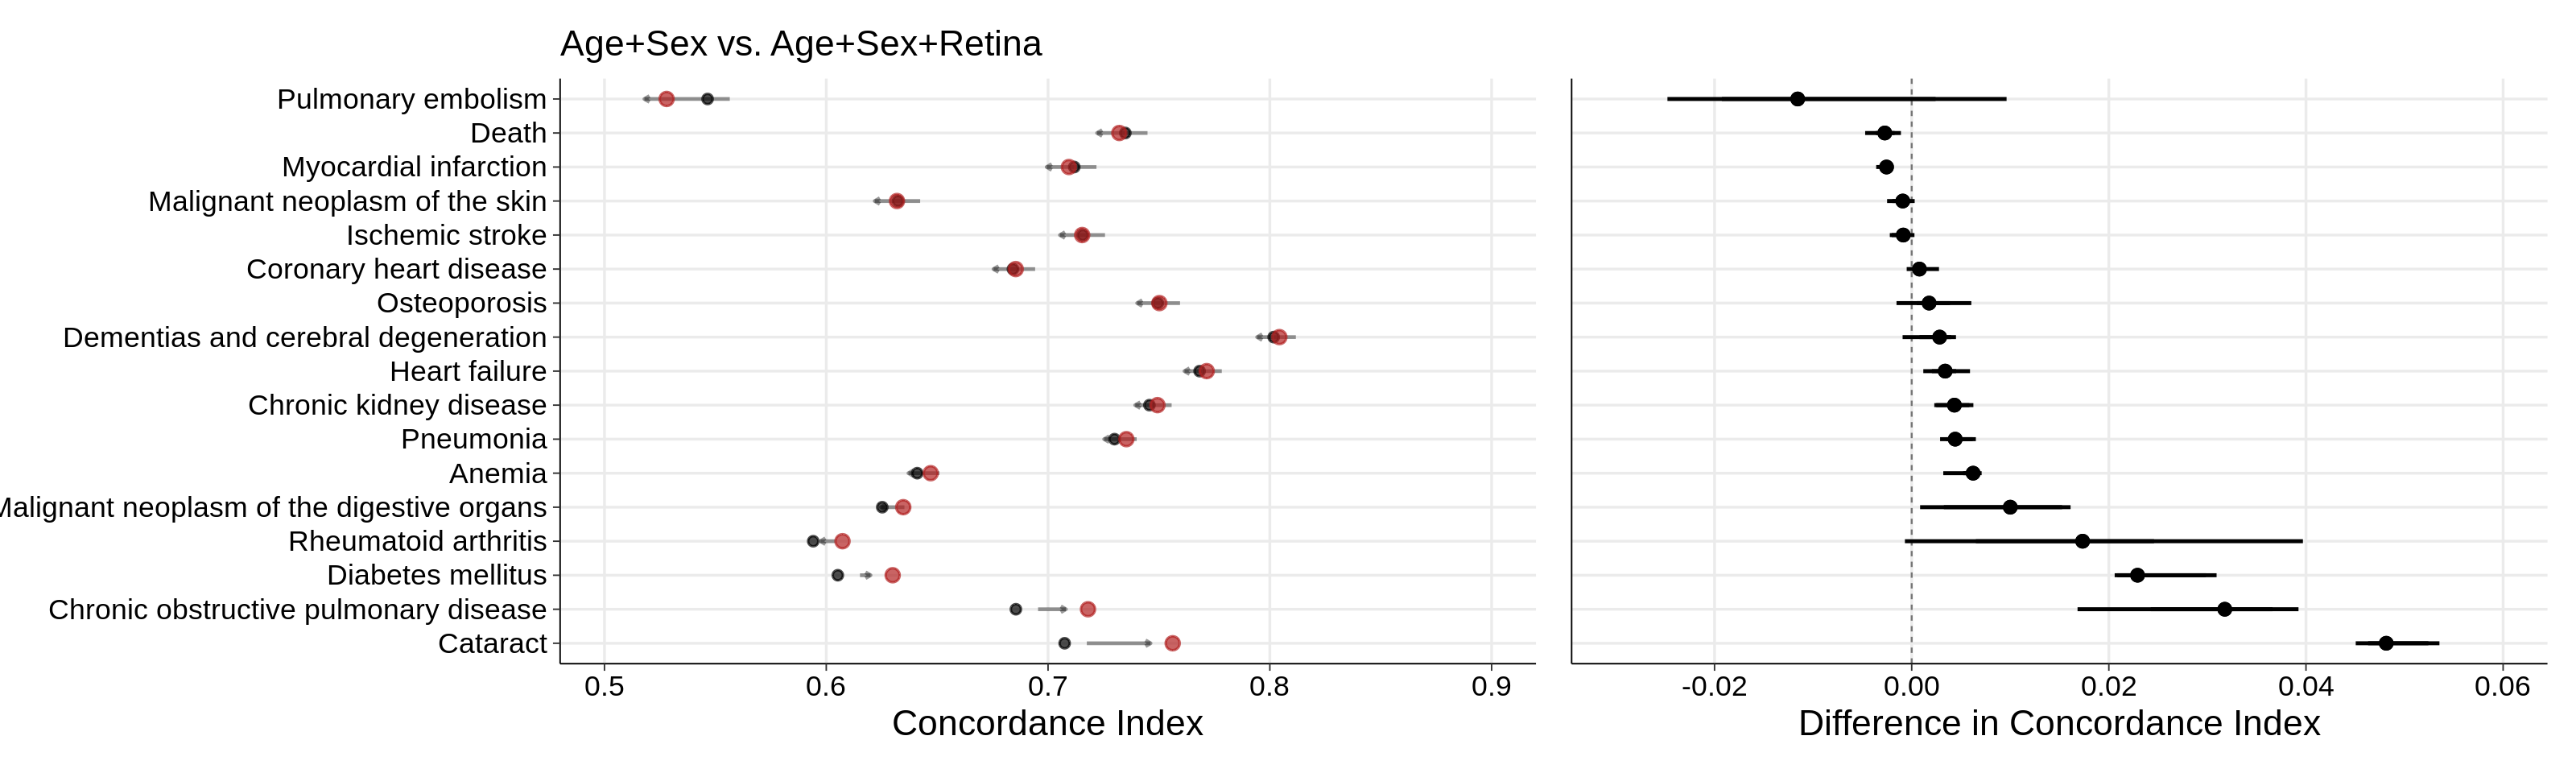

In [23]:
plot_width = 10; plot_height=3; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

fig1 = plot_against_score("Age+Sex", "Age+Sex+Retina")
fig1

In [24]:
plot_name = "SupplFigure3b_EPIC_Discrimination_Selected"
fig1 %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig1 %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

In [25]:
endpoints_cardio = c(
#     'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
#     'phecode_404', #  "Ischemic heart disease",
#     'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
#     'phecode_424', #  "Heart failure", # intervention
#      'OMOP_4306655', #  "All-Cause Death", # intervention
#     'phecode_420', #  "Cardiac arrest", # intervention
#     'phecode_059-1' # COVID
   
# )


    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_424', #  "Heart failure", # intervention
    'OMOP_4306655', #  "All-Cause Death", # intervention
#     'phecode_420' #  "Cardiac arrest", # intervention 
#     "phecode_375-1", # Glaucoma
#     "phecode_374-42", # Diabetic retinopathy
#     "phecode_202", # Diabetes mellitus
#     "phecode_401",	#Hypertension"  
#     "phecode_103", # Malignant neoplasm of the skin
    'phecode_059-1' #  "COVID",
    )

In [26]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)

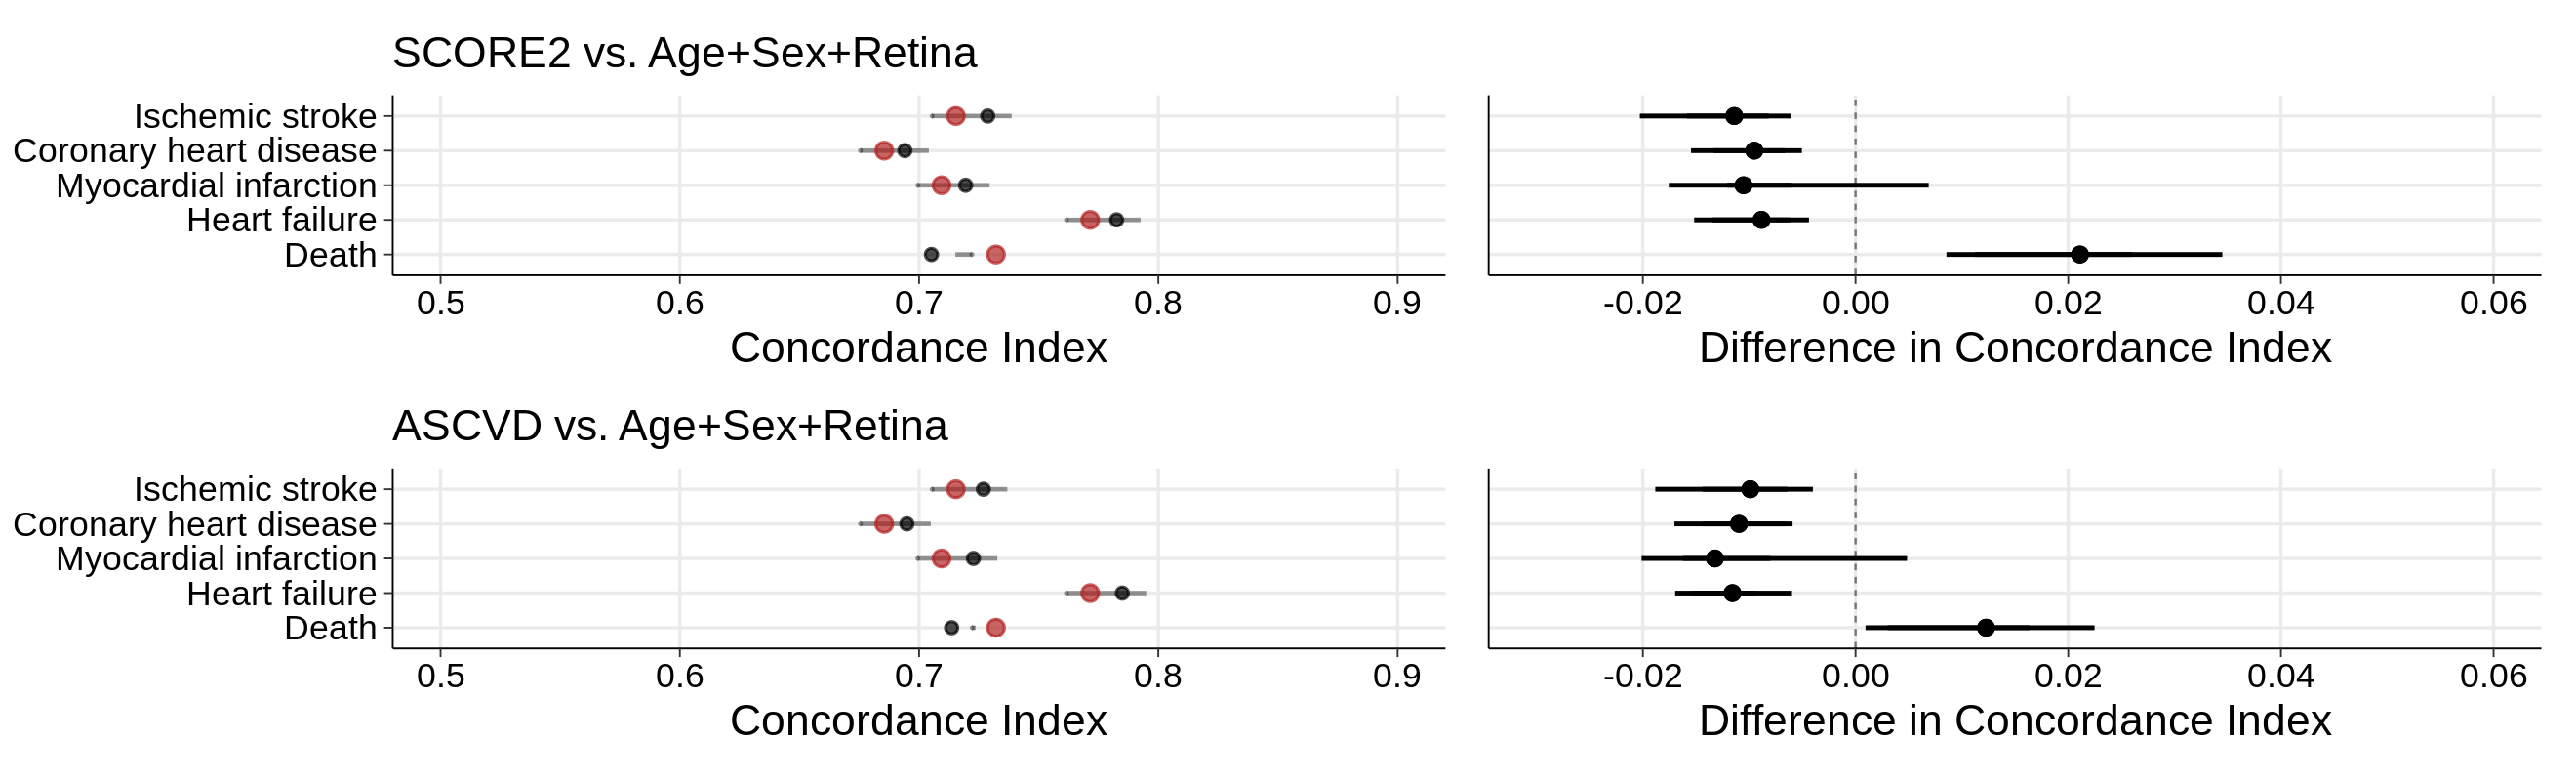

In [27]:
plot_width = 8.25; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)


fig1 = plot_against_score("Age+Sex", "Age+Sex+Retina", endpoints_cardio) 
fig2 = plot_against_score("SCORE2", "Age+Sex+Retina", endpoints_cardio) 
fig3 = plot_against_score("ASCVD", "Age+Sex+Retina", endpoints_cardio)


#fig1/fig2/fig3/fig4 
fig3c = fig2/fig3
fig3c

In [28]:
plot_name = "SupplFigure3c_EPIC_Discrimination_CVD"
fig3c %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig3c %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

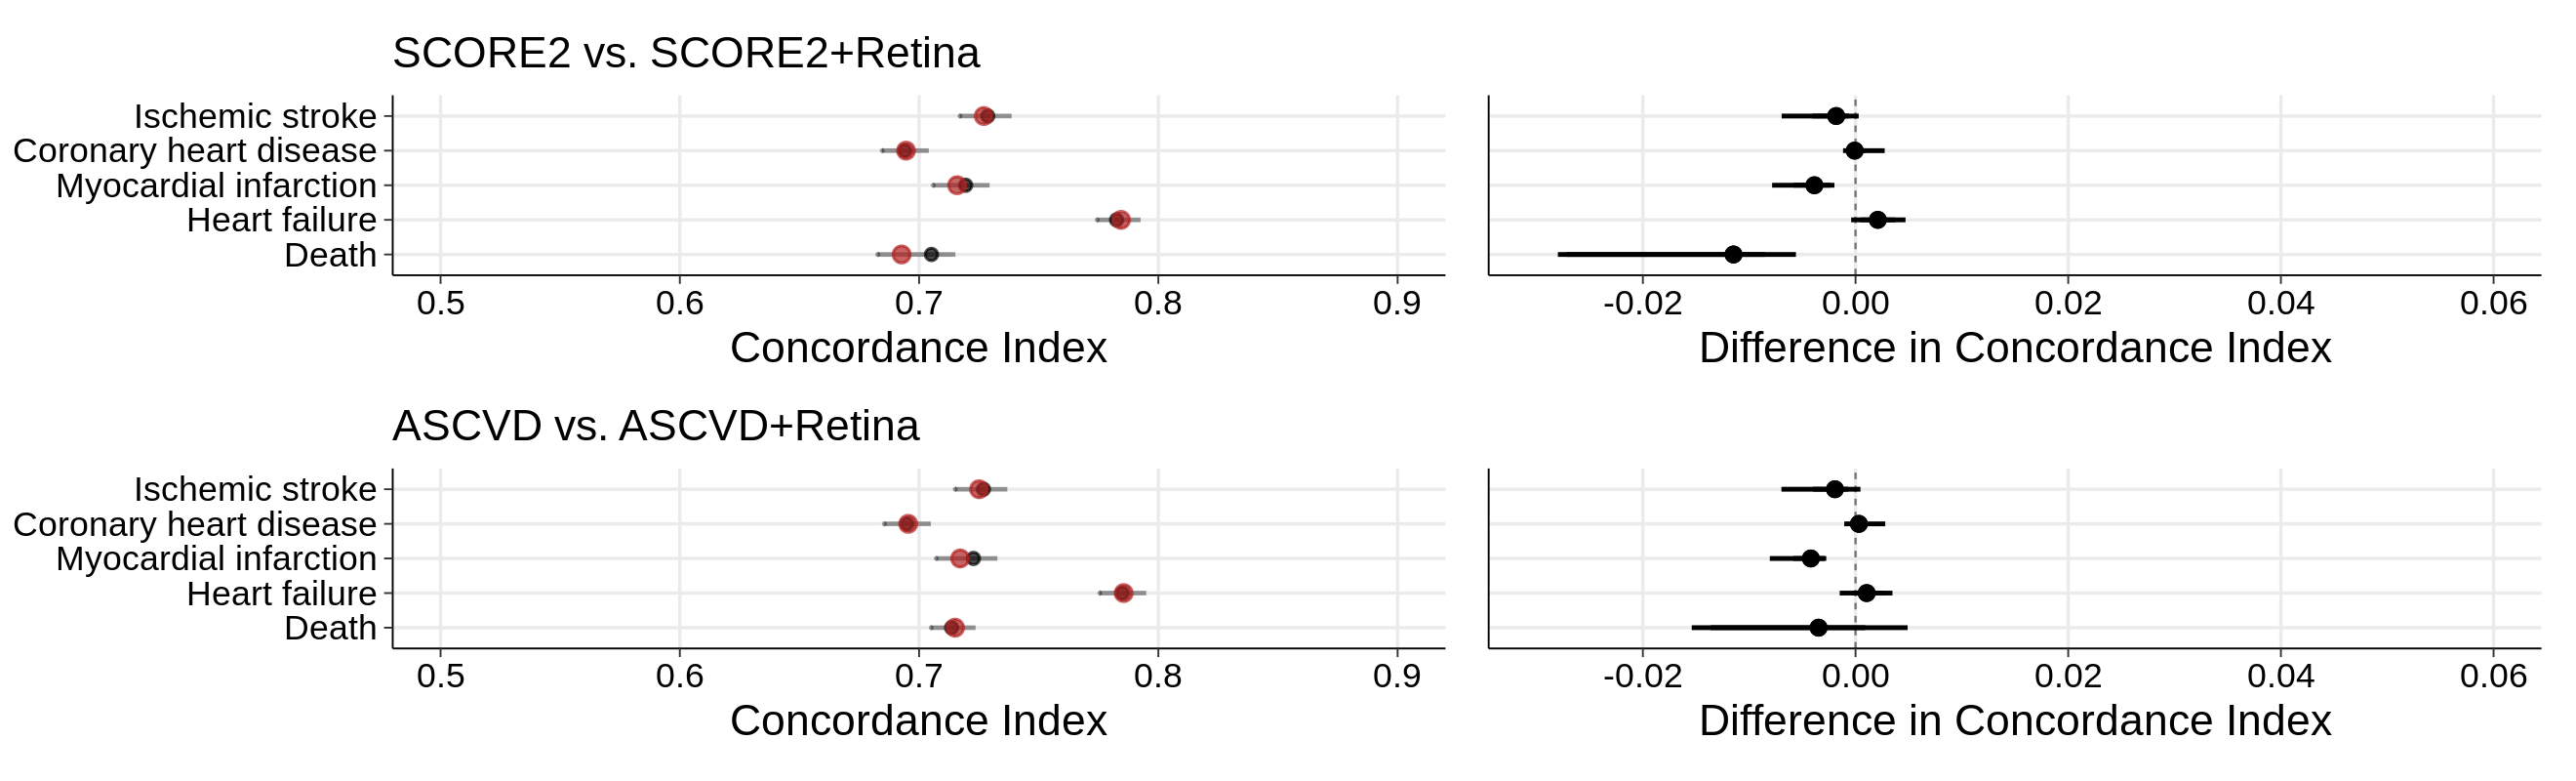

In [29]:
plot_width = 8.25; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

# endpoints_cvd = c(
#     'phecode_404', #  "Ischemic heart disease",
#     'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
#     'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
#     'phecode_424', #  "Heart failure", # intervention
#     'phecode_420' #  "Cardiac arrest", # intervention
# )

fig2 = plot_against_score("SCORE2", "SCORE2+Retina", endpoints_cardio) 
fig3 = plot_against_score("ASCVD", "ASCVD+Retina", endpoints_cardio)

fig3d = fig2/fig3
fig3d

In [30]:
plot_name = "SupplFigure3d_EPIC_CVDadd"
fig3d %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig3d %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)